This document is made in Jupyter Notebook. Available on GitHub at: https://github.com/zhongyuex/BMEN90002-Workshops

# Part 1 - Rate-based Neuron with Constant Input

## Q1: Features of Membrane Potentials
The cell membrane forms topological division between the interior and exterior of a cell. It consists of large network of phospholipid bilayer with embeded proteins, signalling molecules and protein channels. Charged particles passes through channels via various mechanisms of passive movement (diffusion and drift) and active transport. The process of diffusion and drift of an ideal gas can be described mathematically by the following equations:
### Fick's Law of Diffusion
Diffusion occur in direction down the concentration gradient (defined by direction $x$) at a speed scaled by the diffusion coefficient $\mathcal{D}$:

$$J_{\mathrm{diff}} = -\mathcal{D} \frac{\partial [C]}{\partial x}$$
### Ohm's Law for Drift
Drift of a particle with charge $z$ occur in direction down the voltage potential gradient (defined by direction $x$) at a speed scaled by the mobility coefficient $\mu$:

$$J_{\mathrm{drift}} = -\mu z [C] \frac{\partial V}{\partial x}$$
### Einstein related Diffusion and Mobility
At thermal equilibrium, the two constants are connected by the equation where $\kappa$ is the Boltzmann constant and $T$ is the absolute temperature of the environment:

$$\mathcal{D} = \frac {\kappa T} {q} \mu$$
### Nernst Planck Equation
The above equations form the Nernst-Planck equation which defines the passive flow of ions in $(\mathrm{molecules} \cdot \mathrm{cm}^{-2}\cdot \mathrm{s}^{-1})$.

$$J = J_{\mathrm{diff}} + J_{\mathrm{drift}} = -\mu \left( z [C] \frac{\partial V}{\partial x} + \frac{RT}{F}\frac{\partial [C]}{\partial x} \right)$$

From the Nernst Planck equation, we can define the current density across a membrane using Faraday's constant $(F)$ and Avogadro's number $(N_A)$:

$$I = \frac{J z F}{N_A} =  -\frac{\mu}{N_A} \left(z^2 F [C] \frac{\partial V}{\partial x} + z RT\frac{\partial [C]}{\partial x}\right)$$

### Nernst Equation
Assume the membrane sits at electrical equilibrium ($I = 0$), the membrane potential of a cell can be derived by integration.

$$V = V_\mathrm{in} - V_\mathrm{out} = \frac{RT}{zF} \ln \left(\frac {[C]_\mathrm{out}}{[C]_\mathrm{in}}\right)$$

The Nernst equation shows that the equilibrium membrane potential at given temperature is determined by the difference between concentration  of ions inside and outside the cells. In the cellular environment, this concentration difference is driven by active transport. Specific ion channels forces ions such as potassium into the cell and sodium out of the cell using energy provided by ATP hydrolysis. Thus, electrical potential is generated in a resting membrane by the balancing acts between passive diffusion, drift, and active transport.

The channeled transport mechanisms also give rise to membrane conductance and capacitance. This means that the membrane potential can be modelled as a RC circuit; and when electrical potential of a membrane diverge from its resting equilibrium potential, it will be restored by a response that mimic an RC circuit. 

In a neuron, the membrane potential is responsible for triggering action potentials. Specifically, action potentials will be triggered when membrane potential at the axon hillock exceeds a threshold value that opens voltage-gated sodium channels. However, there exist spontaneous and stochastic fluctuations in membrane potential which can also trigger action potentials. Thus, in order to account for some stochasticity, rate models are used to simulate action potentials. In a rate model, the rate of action potentials is determined by the difference between membrane voltage and threshold voltage. The relationship is defined by a user-specified activation functions such as threshold linear functions, sigmoid functions and other increasing functions. In theory, after an action potential, the membrane voltage will be reset to its resting value over an absolute refractory period and a relative refractory period required for conducting the action potential. This process is not modelled by the simple rate model.

The output of the simple rate model appears to be in a wave-like spiking and exponential decaying patter. The waves reaches higher voltage value at times when input spikes are more frequent.

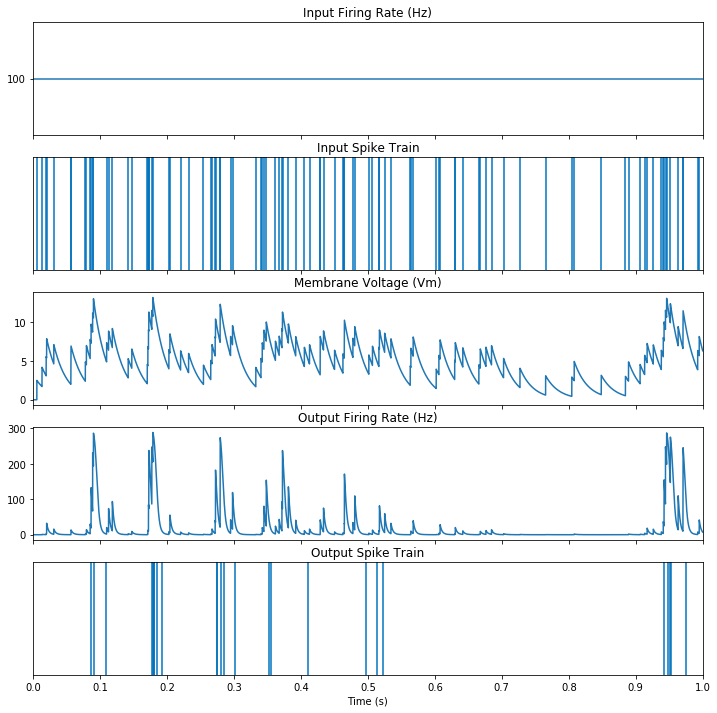

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
np.random.seed(int(time()))

# Generate Stimulus
dt = 0.0001                        # step size in seconds
lentime = 1                        # duration of simulation in seconds
ts = np.arange(0, lentime+dt, dt);   # each step of the full simulation
lensim = len(ts)                   # number of steps in the simulation

rate = 100 # mean input rate
inputspikes = np.random.rand(lensim) < (dt * rate) # input spike train

f, axs = plt.subplots(5, sharex=True, figsize=(12,12))

# Plot Firing Rate vs. Time
axs[0].plot([0, lentime], [rate, rate])
axs[0].set_yticks([100])
axs[0].set_title("Input Firing Rate (Hz)")

# Plot Spike Train Using Random Number Generator
for i in range(lensim):
    if inputspikes[i]:
        spike_time = i*dt
        axs[1].plot([spike_time, spike_time], [0, 1], Color='#0072BD')
axs[1].set_yticks([])
axs[1].set_ylim([0,1])
axs[1].set_title("Input Spike Train")

# Generate Neuronal Model
a = 2.5                 # mV step in membrane voltage for each input
tau = 0.02              # membrane time constant in seconds
v = np.zeros(lensim)    # membrane potential
alpha = np.exp(-dt/tau) # membrane decay rate
for i in range(1, lensim):
    v[i] = alpha * v[i-1]
    if inputspikes[i]:
        v[i] += a
u = 300/(1 + np.exp(-(v-10)))                    # Output Firing Rate
outputspikes = np.random.rand(lensim) < (dt * u) # Output Spike Train

# Plot Membrane Voltage
axs[2].plot(ts, v)
axs[2].set_title("Membrane Voltage (Vm)")

# Plot Output Rate
axs[3].plot(ts, u)
axs[3].set_title("Output Firing Rate (Hz)")

# Plot Output Spike Train
for i in range(lensim):
    if outputspikes[i]:
        spike_time = i*dt
        axs[4].plot([spike_time, spike_time], [0, 1], Color='#0072BD')
axs[4].set_yticks([])
axs[4].set_ylim([0,1])
axs[4].set_xlim([0,1])
axs[4].set_xticks(np.arange(0,1.1,0.1))
axs[4].set_xlabel("Time (s)")
axs[4].set_title("Output Spike Train")

plt.show()

## Q2: Effect of Input Spikes
In this model, only excitatory input spikes are used. When a membrane receives excitatory input spike, its voltage potential will increase according to the weight of that particuar input. (This input is also refered to as graded potentials) These weights are based on biological parameters such as the level of change in conductance caused by the input. In this model the weight is given by the same amplitude of $a = 2.5 mV$. The membrane voltage response to the weight can be calculated by the RC circuit model of membrane potential. For a single delta input at time $t_i$, the model is given by:

$$C \frac{d V}{d t} + \frac {V}{R} = a\delta(t - t_i)$$

Since current input is in the form of Dirac Delta function, the membrane potential increases instantaneously and decreases exponentially due to leaky ion channels modelled as a resistor. By solving for $V$ post $t_i$ (assuming $V(0) = 0$ and $H(t)$ is the unit step function), the response function is given by:

$$V = a H(t-t_i) e^{\frac{-(t-t_i)}{RC}}$$

In our model, the exponential decay is stored as a constant $\alpha = e^{\frac{-(t-t_i)}{\tau}}$ where $\tau = RC$. The decay is applied to the membrane potential of our model at each time step. For spike train input, the model can be calculated iteratively by assuming each input have same effect (which is true given that the weight of each input are the same and the time constant is uniform over time). When the same effect is added dispersely over time, the membrane potential appears to be in a wave like pattern shown in the voltage plot above.

## Q3: Mean Membrane Potential
The mean membrane potential is shown below:

In [88]:
np.mean(v)

4.935747674282351

As explained above, the membrane potential increases instantaneously at input spike time and decreases exponentially if no input spikes observed. Thus the membrane spends more time decaying towards 0, and its mean membrane voltage is low.

## Q4: Effect of Activation Function
The code below is used to calculate the output firing rate of the neuron:
``` matlab
u = 300./(1+exp(-(v-10)));
```
The code represent neuron's activation function: 
$$u = \frac {300} {1+e^{-(v-\theta)}}$$

As mentioned in Q1, the firing rate of a neuron is proportional to its membrane voltage. The activation function normalises the neuronal firing rate. The value $\theta$ represent the threshold potential for the neuron to fire action potential. When the membrane potential is far below $\theta$, the firing rate approaches 0. When the membrane potential is far above $\theta$, the firing rate approaches a maximum (in this case it is scaled to 300). More importantly, when the firing rate approaches $\theta$ from a small range below, it will increase rapidly, meaning that it has a high chance of spontaneously firing when approaching its threshold voltage. This is illustrated by the plot of u vs. v below:

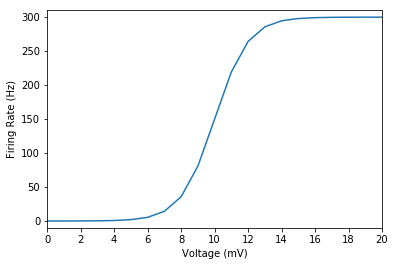

In [121]:
sv = np.arange(0, 21)
su = 300./(1+np.exp(-(sv-10)))
plt.plot(sv, su)
plt.ylim([-10,310])
plt.xlim([0,20])
plt.xticks(np.arange(0,21,2))
plt.ylabel("Firing Rate (Hz)")
plt.xlabel("Voltage (mV)")
plt.show()

## Q5: Saturation Potential
Realistically, the firing rate of a neuron must be limited. During action potential, sodium channels opens and feed to a sharp rise in membrane potential. Then the membrane potential is brought back towards its resting value by the opening of potassium value. The sodium channel then closes by reaching an inactive form. During this period no more action potentials can be initiated, and it is known as the absolute refractory period. When opening of potassium channel brings the voltage level back to its
The absolute refractory period sets an absolute limit on the maximum firing rate. The activation function mimics this absolute limit by its asymptotes. In this model, when membrane voltage far exceeds the threshold, it will fire at maximum rate of 300 Hz.

## Q6: Mean Output Rate
The mean output rate is shown below in Hz:

In [89]:
np.mean(u)

18.594690576713802

From observation, the output rate is mostly maintained at a low level and ocassionally spikes when the input spikes occurs in high density causing the membrane potential to rise near 10 mV. Thus the mean output rate is significantly lower than the input rate.

## Q7: Interspike Intervals
The interspike interval statistics are calculated below:

In [108]:
spiketimes = np.where(inputspikes)[0]*dt
input_isi = spiketimes[1:] - spiketimes[:-1]
input_isi_mean = np.mean(input_isi)
input_isi_std = np.std(input_isi)
input_cv = input_isi_std/input_isi_mean

spiketimes = np.where(outputspikes)[0]*dt
output_isi = spiketimes[1:] - spiketimes[:-1]
output_isi_mean = np.mean(output_isi)
output_isi_std = np.std(output_isi)
output_cv = output_isi_std/output_isi_mean

from tabulate import tabulate
print(tabulate(
        [
            ['Input Spikes', input_isi_mean, input_isi_std, input_cv],
            ['Output Spikes', output_isi_mean, output_isi_std, output_cv]
        ],
        headers = ['Mean', 'Standard Deviation', 'Coefficient of Variation'], tablefmt='fancy_grid'
    )
)

╒═══════════════╤═══════════╤══════════════════════╤════════════════════════════╕
│               │      Mean │   Standard Deviation │   Coefficient of Variation │
╞═══════════════╪═══════════╪══════════════════════╪════════════════════════════╡
│ Input Spikes  │ 0.009892  │             0.010086 │                    1.01961 │
├───────────────┼───────────┼──────────────────────┼────────────────────────────┤
│ Output Spikes │ 0.0370333 │             0.084206 │                    2.27379 │
╘═══════════════╧═══════════╧══════════════════════╧════════════════════════════╛


The output spikes have significantly higher interspike interval time. This is because its firing rate is lowered due to leaky channel that decays the membrane potential. Additionally, the stochastic spiking in firing rate (mentioned above) means output spikes occur in bursts. This will increase standard deviation. 

According to the coefficient of variation, the interspike interval variability is nearly doubled. This is expected since the output spikes are determined by an additional layer of stochasticity. The first layer is the input stochasticity where input rate is converted to spikes. This then determines the output spiking rate which is again converted to spikes by the same stochastic method. Thus the coefficient of variation doubles.

# Part 2 - Rate-based Neuron with Oscillating Input

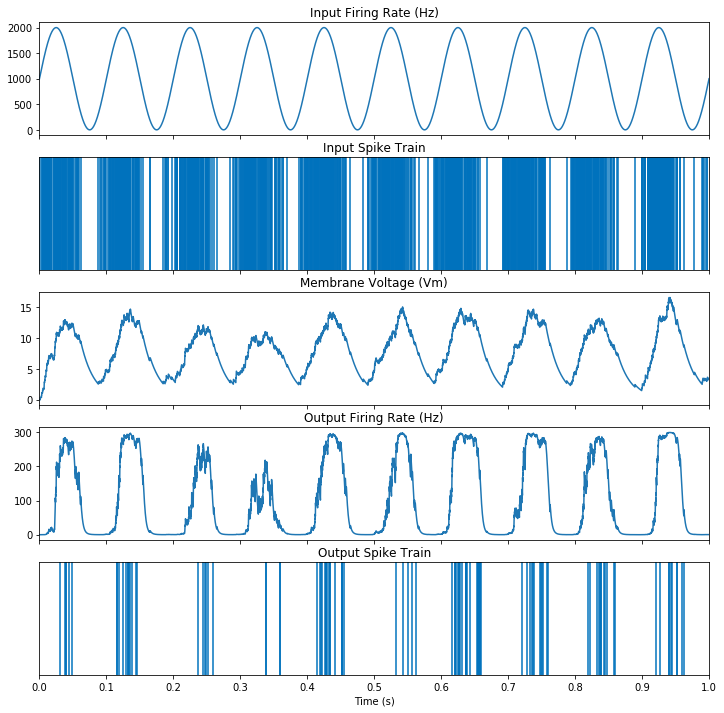

In [177]:
# Generate Stimulus
dt = 0.0001                        # step size in seconds
lentime = 1                        # duration of simulation in seconds
ts = np.arange(0, lentime+dt, dt); # each step of the full simulation
lensim = len(ts)                   # number of steps in the simulation
T = 1/10                           # period
rate = 1000*(1+np.sin(2*np.pi*ts/T)) # mean input rate
inputspikes = np.random.rand(lensim) < (dt * rate) # input spike train

f, axs = plt.subplots(5, sharex=True, figsize=(12,12))

# Plot Firing Rate vs. Time
axs[0].plot(ts, rate)
axs[0].set_title("Input Firing Rate (Hz)")

# Plot Spike Train Using Random Number Generator
for i in range(lensim):
    if inputspikes[i]:
        spike_time = i*dt
        axs[1].plot([spike_time, spike_time], [0, 1], Color='#0072BD')
axs[1].set_yticks([])
axs[1].set_ylim([0,1])
axs[1].set_title("Input Spike Train")

# Generate Neuronal Model
a = 0.4                 # mV step in membrane voltage for each input
tau = 0.02              # membrane time constant in seconds
v = np.zeros(lensim)    # membrane potential
alpha = np.exp(-dt/tau) # membrane decay rate
for i in range(1, lensim):
    v[i] = alpha * v[i-1]
    if inputspikes[i]:
        v[i] += a
u = 300/(1 + np.exp(-(v-10)))                    # Output Firing Rate
outputspikes = np.random.rand(lensim) < (dt * u) # Output Spike Train

# Plot Membrane Voltage
axs[2].plot(ts, v)
axs[2].set_title("Membrane Voltage (Vm)")

# Plot Output Rate
axs[3].plot(ts, u)
axs[3].set_title("Output Firing Rate (Hz)")

# Plot Output Spike Train
for i in range(lensim):
    if outputspikes[i]:
        spike_time = i*dt
        axs[4].plot([spike_time, spike_time], [0, 1], Color='#0072BD')
axs[4].set_yticks([])
axs[4].set_ylim([0,1])
axs[4].set_xlim([0,1])
axs[4].set_xticks(np.arange(0,1.1,0.1))
axs[4].set_xlabel("Time (s)")
axs[4].set_title("Output Spike Train")

plt.show()

## Q8 Membrane Potential and Effect of Input Structure
When inputs are fired at high frequency, higher spike density is observed, and the membrane potential increases to a higher level. When inputs are fired at lower frequency, low spike density is observed, and the membrane potential will decay.

In this case, the input rate is oscillating between very high and very low frequencies, and the resulting action potentials are of great resemblance of the input rate. Thus the membrane potential also closely resembles the input rate function. 

## Q9 Statistics of Membrane Potential
Mean membrane potential (in mV) after $t = 0.1s$:

In [178]:
start = np.where(ts == 0.1)[0][0]
np.mean(v[start:])

7.852126753413973

Minimum membrane potential (in mV) after $t = 0.1s$:

In [179]:
min(v[start:])

1.4777210577341433

Maximum membrane potential (in mV) after $t = 0.1s$:

In [180]:
max(v[start:])

16.506056169959116

## Q10 Why does Membrane Potential not reach 0?
The minimum membrane potential does not reach 0 because the membrane potential decreases exponentially. This means the membrane potential can only assymptotically approach but never reach 0. Although at high voltage value the membrane potential appears to decrease in similar rate as the input rate function, at lower voltage levels the rate of decrease is reduced significantly. And the input oscillation time is insufficient for the membrane potential to decrease down to a level very close to 0.

## Q11 Mean Output Rate
The mean output rate is shown below in Hz:

In [181]:
np.mean(u)

98.20844192251283

## Q12 Synchronisation Index
The synchronisation index are calculated five times for each duration below:

In [182]:
def synchronisation(spiketrain, T):
    s = 0
    c = 0
    t_i = 0
    for i, t in enumerate(ts):
        if spikes[i]:
            t_i += 1
        if i % (T/dt) == 0:
            s += np.sin(2*np.pi*t_i/T);
            c += np.cos(2*np.pi*t_i/T);
            t_i = 0 # reset bin

    N = sum(spiketrain)
    s /= N;
    c /= N;
    return(np.sqrt(s**2 + c**2))

def simulation(lentime):
    # Generate Stimulus
    dt = 0.0001                        # step size in seconds
    ts = np.arange(0, lentime+dt, dt); # each step of the full simulation
    lensim = len(ts)                   # number of steps in the simulation
    T = 1/10                           # period
    rate = 1000*(1+np.sin(2*np.pi*ts/T)) # mean input rate
    inputspikes = np.random.rand(lensim) < (dt * rate) # input spike train
    # Generate Neuronal Model
    a = 0.4                 # mV step in membrane voltage for each input
    tau = 0.02              # membrane time constant in seconds
    v = np.zeros(lensim)    # membrane potential
    alpha = np.exp(-dt/tau) # membrane decay rate
    for i in range(1, lensim):
        v[i] = alpha * v[i-1]
        if inputspikes[i]:
            v[i] += a
    u = 300/(1 + np.exp(-(v-10)))                    # Output Firing Rate
    outputspikes = np.random.rand(lensim) < (dt * u) # Output Spike Train
    return outputspikes

table = []
for trial_n in range(5):
    table.append(["Trial " + str(trial_n + 1)])
    outputspikes = simulation(1)  # 1 second simulation
    table[trial_n].append(synchronisation(outputspikes, T))

    outputspikes = simulation(10) # 10 second simulation
    table[trial_n].append(synchronisation(outputspikes, T))

print(tabulate(table,
        headers = ['1s duration', '10s duration'], tablefmt='fancy_grid'
    )
)

╒═════════╤═══════════════╤════════════════╕
│         │   1s duration │   10s duration │
╞═════════╪═══════════════╪════════════════╡
│ Trial 1 │     0.0964912 │      0.0104862 │
├─────────┼───────────────┼────────────────┤
│ Trial 2 │     0.0894309 │      0.010157  │
├─────────┼───────────────┼────────────────┤
│ Trial 3 │     0.114583  │      0.0113519 │
├─────────┼───────────────┼────────────────┤
│ Trial 4 │     0.0973451 │      0.010397  │
├─────────┼───────────────┼────────────────┤
│ Trial 5 │     0.1       │      0.0101476 │
╘═════════╧═══════════════╧════════════════╛


As duration increases, the synchronisation index decreases but it shows less variability. The decrease by a factor of 10 shows that there are no overall change in mean firing rate and that $N$ is scaled based on duration. Furthermore, the variability in synchronisation index decreases because of the law of large numbers. Longer duration means more data is being generated and lower deviations are observed.

# Part 3 - Integrate-and-Fire Model with Constant Input

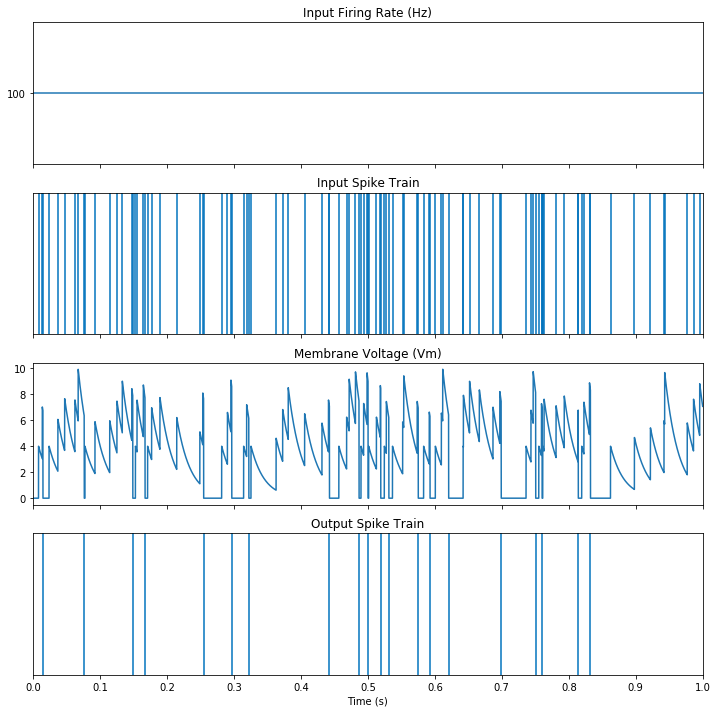

In [171]:
# Generate Stimulus
dt = 0.0001                        # step size in seconds
lentime = 1                        # duration of simulation in seconds
ts = np.arange(0, lentime+dt, dt);   # each step of the full simulation
lensim = len(ts)                   # number of steps in the simulation

rate = 100 # mean input rate
inputspikes = np.random.rand(lensim) < (dt * rate) # input spike train

f, axs = plt.subplots(4, sharex=True, figsize=(12,12))

# Plot Firing Rate vs. Time
axs[0].plot([0, lentime], [rate, rate])
axs[0].set_yticks([100])
axs[0].set_title("Input Firing Rate (Hz)")

# Plot Spike Train Using Random Number Generator
for i in range(lensim):
    if inputspikes[i]:
        spike_time = i*dt
        axs[1].plot([spike_time, spike_time], [0, 1], Color='#0072BD')
axs[1].set_yticks([])
axs[1].set_ylim([0,1])
axs[1].set_title("Input Spike Train")

# Generate Neuronal Model
a = 4.0                 # mV step in membrane voltage for each input
threshold = 10          # mV voltage threshold for action potentials
tau = 0.02              # membrane time constant in seconds
v_r = 0                 # resting membrane potential
v = np.zeros(lensim)    # membrane potential
outputspikes = np.zeros(lensim) # Output Spike Train
alpha = np.exp(-dt/tau) # membrane decay rate
for i in range(1, lensim):
    v[i] = alpha * v[i-1]
    if inputspikes[i]:
        v[i] += a
    if v[i] >= threshold:
        v[i] = v_r
        outputspikes[i] = 1

# Plot Membrane Voltage
axs[2].plot(ts, v)
axs[2].set_title("Membrane Voltage (Vm)")

# Plot Output Spike Train
for i in range(lensim):
    if outputspikes[i]:
        spike_time = i*dt
        axs[3].plot([spike_time, spike_time], [0, 1], Color='#0072BD')
axs[3].set_yticks([])
axs[3].set_ylim([0,1])
axs[3].set_xlim([0,1])
axs[3].set_xticks(np.arange(0,1.1,0.1))
axs[3].set_xlabel("Time (s)")
axs[3].set_title("Output Spike Train")

plt.show()

## Q13: Features of Membrane Potential
Although the absolute refractory period is not included in this model, the integrate and fire model more accurately depict physiological membrane potential by having an action potential voltage threshold and a reset mechanism. Subsequently, the membrane voltage it displays will never reach above threshold voltage (10mV) even when input spike is observed. When the voltage level have the ability to reach threshold voltage (10mV), it will immediately reduce to resting potential (0). The rest of the model's membrane voltage behaviour is similar to the firing rate model. A wave-like spiking behaviour is observed with intermittent square troughs where the voltage resets and have yet to receive further input action potentials.

## Q14: Effect of Input Spikes
The input spikes show same effect on membrane voltage as the rate model, with exceptions of when membrane voltage exceeds its voltage threshold. This behaviour is explained above.

## Q15: Effect of Output Spikes
Each output spike occurs at time where membrane potential exceeds the threshold. This model resets the membrane at the time when threshold is exceeded. Thus it can be seen that the output spike indicates a membrane potential reset at its resting value (0)

## Q16: Mean Membrane Potential
The mean membrane potential is shown below in mV:

In [172]:
np.mean(v)

3.506587287535853

## Q17-18: Interspike Intervals

In [173]:
spiketimes = np.where(inputspikes)[0]*dt
input_isi = spiketimes[1:] - spiketimes[:-1]
input_isi_mean = np.mean(input_isi)
input_isi_std = np.std(input_isi)
input_cv = input_isi_std/input_isi_mean

spiketimes = np.where(outputspikes)[0]*dt
output_isi = spiketimes[1:] - spiketimes[:-1]
output_isi_mean = np.mean(output_isi)
output_isi_std = np.std(output_isi)
output_cv = output_isi_std/output_isi_mean

from tabulate import tabulate
print(tabulate(
        [
            ['Input Spikes', input_isi_mean, input_isi_std, input_cv],
            ['Output Spikes', output_isi_mean, output_isi_std, output_cv]
        ],
        headers = ['Mean', 'Standard Deviation', 'Coefficient of Variation'], tablefmt='fancy_grid'
    )
)

╒═══════════════╤════════════╤══════════════════════╤════════════════════════════╕
│               │       Mean │   Standard Deviation │   Coefficient of Variation │
╞═══════════════╪════════════╪══════════════════════╪════════════════════════════╡
│ Input Spikes  │ 0.00977624 │           0.00918059 │                   0.939072 │
├───────────────┼────────────┼──────────────────────┼────────────────────────────┤
│ Output Spikes │ 0.0430368  │           0.0295374  │                   0.686328 │
╘═══════════════╧════════════╧══════════════════════╧════════════════════════════╛


The output spikes have significantly higher mean interspike interval time and deviation. This is because its firing rate is lowered due to leaky channel that decays the membrane potential. Only highly frequent inputs are able to trigger an action potential, and these input spikes are randomly dispersed with high standard deviations.

Furthermore, the coefficient of variation shows that the output spikes are less stochastic. This result is expected because the outputspike is fully deterministic by the sequence of input spikes. Thus its generation only carries the remaining stochastic information from the input spike. The statistical variations observed here are a result of the nature of output spike generations and the fact that output having fewer spikes than the input.

## Q19 Variability Comparison to Rate-based Model
In the rate model, the output undergoes two layers of stochastic processing. Thus its coefficient of variation is higher in the output. In the integrate-and-fire model, the coefficient of variation decreases because its spikes are generated deterministically post generation of input spikes. 

# Part 4 - Integrate-and-Fire Model with Oscillating Input

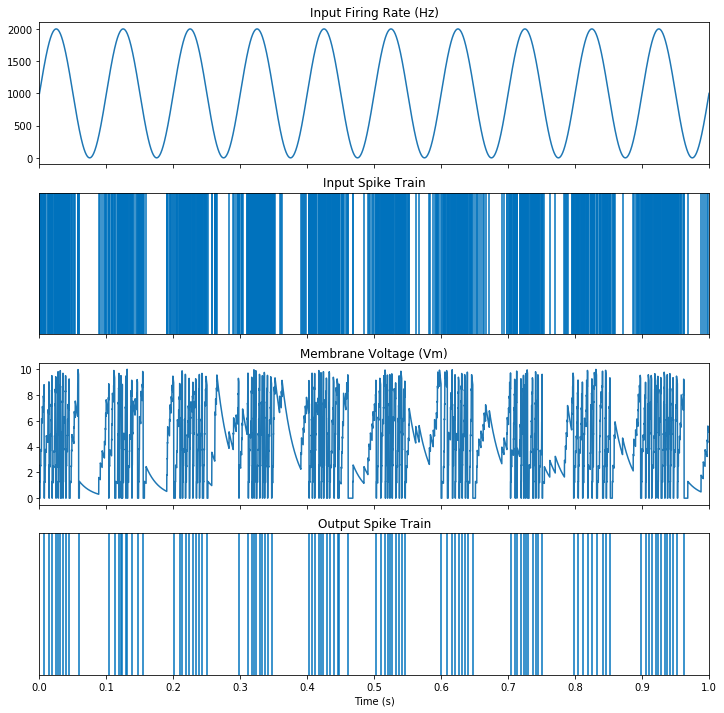

In [174]:
# Generate Stimulus
dt = 0.0001                        # step size in seconds
lentime = 1                        # duration of simulation in seconds
ts = np.arange(0, lentime+dt, dt);   # each step of the full simulation
lensim = len(ts)                   # number of steps in the simulation

rate = 1000*(1+np.sin(2*np.pi*ts/T)) # mean input rate
inputspikes = np.random.rand(lensim) < (dt * rate) # input spike train

f, axs = plt.subplots(4, sharex=True, figsize=(12,12))

# Plot Firing Rate vs. Time
axs[0].plot(ts, rate)
axs[0].set_title("Input Firing Rate (Hz)")

# Plot Spike Train Using Random Number Generator
for i in range(lensim):
    if inputspikes[i]:
        spike_time = i*dt
        axs[1].plot([spike_time, spike_time], [0, 1], Color='#0072BD')
axs[1].set_yticks([])
axs[1].set_ylim([0,1])
axs[1].set_title("Input Spike Train")

# Generate Neuronal Model
a = 1.3                 # mV step in membrane voltage for each input
threshold = 10          # mV voltage threshold for action potentials
tau = 0.02              # membrane time constant in seconds
v_r = 0                 # resting membrane potential
v = np.zeros(lensim)    # membrane potential
outputspikes = np.zeros(lensim) # Output Spike Train
alpha = np.exp(-dt/tau) # membrane decay rate
for i in range(1, lensim):
    v[i] = alpha * v[i-1]
    if inputspikes[i]:
        v[i] += a
    if v[i] >= threshold:
        v[i] = v_r
        outputspikes[i] = 1

# Plot Membrane Voltage
axs[2].plot(ts, v)
axs[2].set_title("Membrane Voltage (Vm)")

# Plot Output Spike Train
for i in range(lensim):
    if outputspikes[i]:
        spike_time = i*dt
        axs[3].plot([spike_time, spike_time], [0, 1], Color='#0072BD')
axs[3].set_yticks([])
axs[3].set_ylim([0,1])
axs[3].set_xlim([0,1])
axs[3].set_xticks(np.arange(0,1.1,0.1))
axs[3].set_xlabel("Time (s)")
axs[3].set_title("Output Spike Train")

plt.show()

## Q20: Features of Membrane Potential
The membrane potential flutuates between threshold and resting potential at periods of high input spiking rates. Then grows steadily at periods of low but increasing spiking rates. During its flutuation, (which occurs due to contstant stimuli pushing the membrane potential to threshold causing it to reset) multiple action potentials are generated in bust. These leads to an output spiking behaviour very similar to the input spike (but more diluted).

## Q21: Mean Membrane Potential
The mean membrane potential in Vm is calculated below:

In [175]:
np.mean(v)

4.245463613442871

## Q22: Mean Output Rate
The mean output rate in Hz is calculated below:

In [176]:
sum(outputspikes)/lentime

104.0

The mean output rate appears to be nearly 1/10 of the input rate because nearly 10 densely situated inputs are required to generate an action potential.

## Q23: Comparison to Rate Model
This mean output rate is very similar to the rate observed in Q11 of Part 2 eventhough the activation value is higher for the integrate-and-fire model. This is within expectation since the reset process does not occur in the rate model and it can be therefore be maintained at high rate of firing by input spikes. The mean membrane potential is almost halved of the membrane potential in Q9 of Part 2. This is also because the membrane potential of firing rate model is allowed to exceed the threshold potential.

The reset process also provides the difference in voltage profile. For rate model the voltage profile closely follows the input rates. On the other hand, the integrate-and-fire model shows extremely dense flutuations at periods of high voltage (as the voltage constantly spikes and resets), instead of peaking with stationery point behaviour shown in rate models.

(refer to Matlab code for SI)